In [35]:
# Dados das descrições das imagens
! gdown --id 1cD6jScRzgEXjyLi79XzyeST1OU2zAFZC

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cD6jScRzgEXjyLi79XzyeST1OU2zAFZC
To: /content/Flickr8k.token.txt
100% 3.39M/3.39M [00:00<00:00, 149MB/s]


In [36]:
# Features das imagens
! gdown --id 1rhtf-uDL0u-00xayVebvoXWyMKPRBijb
! gdown --id 1UnT0MeAp5_TVLXKKeQEQIFqgtHdKLXO8

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rhtf-uDL0u-00xayVebvoXWyMKPRBijb
To: /content/features.pkl
100% 133M/133M [00:00<00:00, 195MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1UnT0MeAp5_TVLXKKeQEQIFqgtHdKLXO8
To: /content/featuresInceptionResNetV2.pkl
100% 50.2M/50.2M [00:00<00:00, 203MB/s]


In [37]:
# Imports necessarios
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add
import matplotlib.pyplot as plt

In [38]:
BASE_DIR = ''
WORKING_DIR = ''

In [39]:
# Carregando o modelo para extracao de caracteristicas
model = ResNet50()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# Mostrando a arquitetura do modelo
# Vamos descartar a ultima camada, responsavel pelas predicoes do contexto inserido
# Nesse momento, queremos somente gerar um vetor caracteristico para cada imagem
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

Executar a primeira vez que rodar o código para extração das features

In [40]:
# Dados de imagens
! gdown --id 1N-hFzGBTJvm_PG5JGoV1S2aMH2oamg0O

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1N-hFzGBTJvm_PG5JGoV1S2aMH2oamg0O
To: /content/Images.zip
100% 1.11G/1.11G [00:06<00:00, 177MB/s] 


In [41]:
# Unziping dados
import zipfile
with zipfile.ZipFile('Images.zip', 'r') as zip_ref:
    zip_ref.extractall('Images')

In [42]:
# Extraindo as features das imagens
features = {}
directory = os.path.join(BASE_DIR, 'Images/Images')

for img_name in tqdm(os.listdir(directory)):
    # Carrega imagem
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # Tratamento para entrada no modelo
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # Pre processamento necessario para VGG
    image = preprocess_input(image)
    # Extraindo as features
    feature = model.predict(image, verbose=0)
    # Armazenando os nomes das imagens
    image_id = img_name.split('.')[0]
    # Armazenando as features
    features[image_id] = feature

  0%|          | 0/8091 [00:00<?, ?it/s]

In [43]:
# Baixando um arquivo para salvar as features
# Essa e' uma das partes mais demoradas do codigo e pode trazer consequencias
# de RAM ao fim do processo. Por isso, a extracao pode ser feita na primeira
# iteracao e armazenada para o arquivo para futura leitura e uso.
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features.pkl'), 'wb'))

In [44]:
# Montanado drive para download do arquivo
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [45]:
# Salvando o arquivo no drive compartilhado
!cp features.pkl '/content/gdrive/My Drive/USP-2023.1/Colab_data/'
!ls -lt '/content/gdrive/My Drive/USP-2023.1/Colab_data/'

cp: cannot create regular file '/content/gdrive/My Drive/USP-2023.1/Colab_data/': No such file or directory
ls: cannot access '/content/gdrive/My Drive/USP-2023.1/Colab_data/': No such file or directory


Caso já tenha executado uma vez anteriormente, partir daqui.

In [46]:
# Baixando os dados referentes as features extraidas das imagens
with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

Lendo os captions

In [47]:
# Abrindo e lendo os dados das captions das imagens
with open(os.path.join(BASE_DIR, 'Flickr8k.token.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [48]:
# Criando dicionario com o nome das imgaens e seus respectivos captions
mapping = {}
for i in tqdm(captions_doc.split('\n')):
    try:
        img_name = i.split('\t')[0][:-6]    # retirando extensao '.jpg' e armazenando o nome da imagem
        caption = i.split('\t')[1]          # armazenando o captions
        if img_name not in mapping:
            mapping[img_name] = [caption]

        else:
            mapping[img_name].append(caption)
    except:
        pass

  0%|          | 0/40455 [00:00<?, ?it/s]

In [49]:
len(mapping)

8091

Processando os elementos textuais

In [50]:
# Funcao que 'limpa' o dicionario de captions, padronizando as sentencas
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            caption = captions[i]

            caption = caption.lower()                   # transformando em lower case
            caption = caption.replace('[^A-Za-z]', '')  # retirando digitos, caracteres especiais e afins
            caption = caption.replace('\s+', ' ')       # retirando espaços indesejados

            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq' # coloando marcadores
            captions[i] = caption

In [51]:
# Exemplo de captions pre processamento de limpeza
mapping['667626_18933d713e']

['A girl is stretched out in shallow water',
 'A girl wearing a red and multi-colored bikini is laying on her back in shallow water .',
 'A little girl in a red swimsuit is laying on her back in shallow water .',
 'A young girl is lying in the sand , while ocean water is surrounding her .',
 'Girl wearing a bikini lying on her back in a shallow pool of clear blue water .']

In [52]:
# Processando a limpeza
clean(mapping)

In [53]:
# Exemplo de captions pos processamento de limpeza
mapping['667626_18933d713e']

['startseq girl is stretched out in shallow water endseq',
 'startseq girl wearing red and multi-colored bikini is laying on her back in shallow water endseq',
 'startseq little girl in red swimsuit is laying on her back in shallow water endseq',
 'startseq young girl is lying in the sand while ocean water is surrounding her endseq',
 'startseq girl wearing bikini lying on her back in shallow pool of clear blue water endseq']

In [54]:
# Armazenando todos os captions em uma lista
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [55]:
len(all_captions)

40454

In [56]:
all_captions[:10]

['startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tri-colored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq',
 'startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq']

In [57]:
# Tokenizando as sentencas
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [58]:
vocab_size

8484

In [59]:
# Armazenando o tamanho da maior sentenca dos captions
max_length = max(len(caption.split()) for caption in all_captions)
max_length

34

Divisão de treino e teste

In [60]:
# Dividindo os dados em treino e teste
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [61]:
# Funcao que cria a base de dados
# Ela tambem foi uma solucao para testes em valores altos de epoca
# Para cada epoca, chame a funcao novamente para evitar crashs de RAM
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]

            for caption in captions:    # para cada caption
                seq = tokenizer.texts_to_sequences([caption])[0]

                # Divide os dados em input e output de cada camada do modelo
                # in_seq - sequencia de entrada, variando a cada iteracao
                # out_seq - palavra que deve ser predita com o in_seq
                for i in range(1, len(seq)):
                    # dividindo os dados
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                    # armazenando as sequencias
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

Modelo

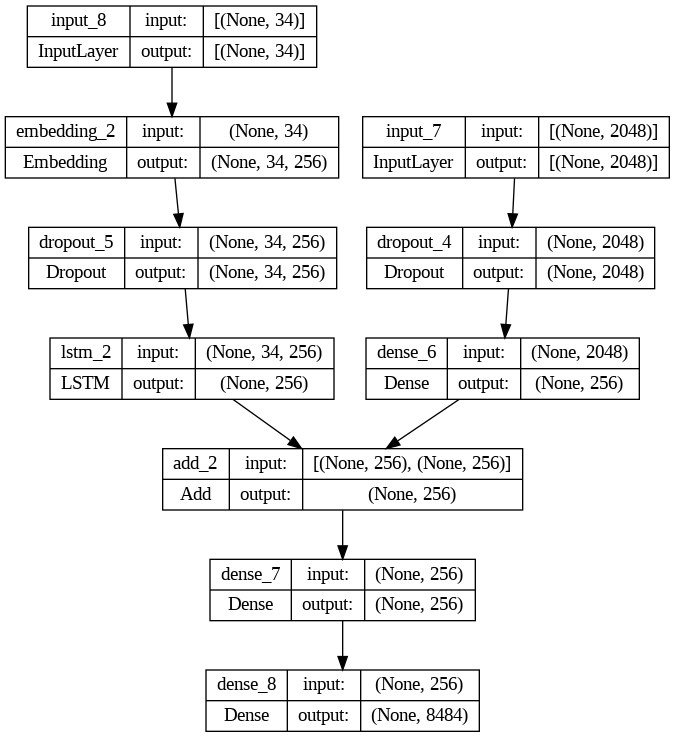

In [64]:
# Montando o modelo de encoder
# O modelo e' dividido em duas partes: processamento das imagens e das captions

# O input1 e' responsavel por processar as features extraidas das imagens
inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

# O input2 e' responsavel por processar as captions
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# Montado o modelo decoder
# Apos o processamento anterior, ins inputs sao adicionados a camadas unicas de
# processamento
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Visualizando o modelo graficamente
plot_model(model, show_shapes=True)

In [65]:
# Treinando o modelo
epochs = 20
batch_size = 32
steps = len(train) // batch_size

# Caso tenha problemas de crash de RAM, tirar o comentario a seguir e comentar a segunda parte
# for i in range(epochs):
#     # create data generator
#     generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
#     # fit for one epoch
#     model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
historyModel = model.fit(generator, epochs=epochs, steps_per_epoch=steps, verbose=1)

Epoch 1/20
227/227 [==============================] - 89s 363ms/step - loss: 5.2512
Epoch 2/20
227/227 [==============================] - 68s 301ms/step - loss: 4.0049
Epoch 3/20
227/227 [==============================] - 65s 288ms/step - loss: 3.5867
Epoch 4/20
227/227 [==============================] - 65s 288ms/step - loss: 3.3381
Epoch 5/20
227/227 [==============================] - 64s 281ms/step - loss: 3.1552
Epoch 6/20
227/227 [==============================] - 67s 294ms/step - loss: 3.0078
Epoch 7/20
227/227 [==============================] - 65s 287ms/step - loss: 2.8865
Epoch 8/20
227/227 [==============================] - 66s 290ms/step - loss: 2.7879
Epoch 9/20
227/227 [==============================] - 63s 278ms/step - loss: 2.7114
Epoch 10/20
227/227 [==============================] - 64s 281ms/step - loss: 2.6382
Epoch 11/20
227/227 [==============================] - 65s 287ms/step - loss: 2.5742
Epoch 12/20
227/227 [==============================] - 63s 277ms/step - lo

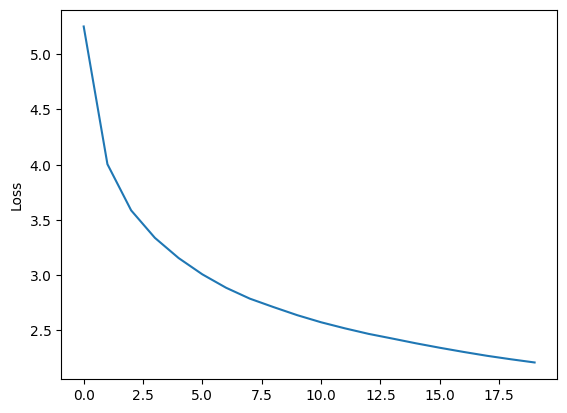

In [66]:
# Plotando o grafico da loss
plt.plot(historyModel.history['loss'])
plt.ylabel('Loss')
plt.show()

In [67]:
# Salvando o modelo para testes
model.save(WORKING_DIR+'/best_model.h5')

Teste

In [68]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [69]:
# Etapa de teste - gerando as captions para imagens
def predict_caption(model, image, tokenizer, max_length):
    # A primeira palavra apos receber as features e' a tag de start
    in_text = 'startseq'
    # Iteracao ate o tamanho maximo de caption existente
    for i in range(max_length):
        # Processando sentenca de entrada
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length)
        # Predizendo proxima palavra dada a sentenca anterior
        yhat = model.predict([image, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idx_to_word(yhat, tokenizer)

        # Interrompe se nenhuma palavra for encontrada
        if word is None:
            break
        # Append da palavra separada por espaco para forma a frase
        in_text += " " + word

        # Interrompe se aparecer a tag de fim de sentenca
        if word == 'endseq':
            break

    return in_text

In [70]:
from nltk.translate.bleu_score import corpus_bleu

# Validando o conjunto de teste
actual, predicted = list(), list()

for key in tqdm(test):
    # Armazena o caption atual
    captions = mapping[key]
    # Prediz o caption para a imagem
    y_pred = predict_caption(model, features[key], tokenizer, max_length)
    # Divide entre as palavras
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # Cria sentenca
    actual.append(actual_captions)
    predicted.append(y_pred)

# Calcula BLEU score (entre 0 e 1)
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/810 [00:00<?, ?it/s]

BLEU-1: 0.575772
BLEU-2: 0.354604


Visualizando alguns resultados

In [71]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Images/Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
startseq brown doberman is outside with stick in its mouth endseq
startseq brown dog shows his teeth endseq
startseq dog bites stick endseq
startseq dog is biting twig endseq
startseq dog with sharp teeth is chewing on stick outside endseq
--------------------Predicted--------------------
startseq brown dog bites the face of reddish rock endseq


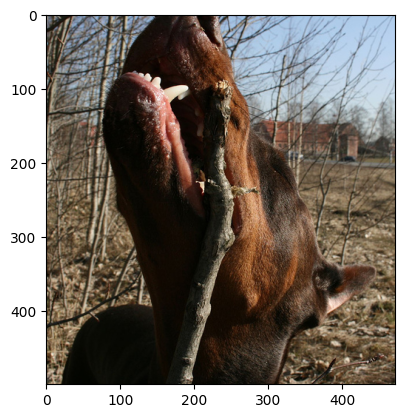

In [72]:
generate_caption(test[1]+'.jpg')

---------------------Actual---------------------
startseq couple posing in front of picture wall endseq
startseq an adult couple pose by cardboard cut out for movie endseq
startseq an asian couple are standing by fantasy poster endseq
startseq an asian couple stands near wax figure endseq
startseq one person in brown suit with his arm around another in hat by wall endseq
--------------------Predicted--------------------
startseq two men in tuxedos are standing in front of tall tree endseq


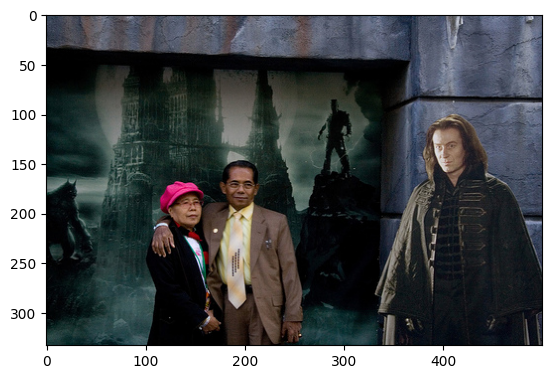

In [73]:
generate_caption(test[2]+'.jpg')

---------------------Actual---------------------
startseq bus filled with passengers in chicago at night endseq
startseq bus full of people waiting at stop endseq
startseq people are sitting on bus endseq
startseq people in bus which is heading to 84 peterson endseq
startseq there are people sitting on bus that is labeled 84 peterson endseq
--------------------Predicted--------------------
startseq man is sitting at the top of the train seat is sitting on the subway endseq


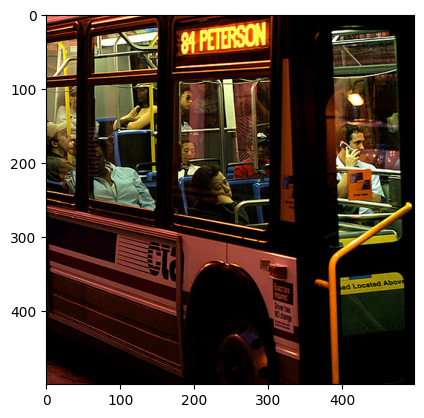

In [74]:
generate_caption(test[3]+'.jpg')